# Simple Graph Traversal

As a first example, and to get familiar with VDMS API, we will do a simple query 
that request information about a Hike and the people linked to that hike.

The first step is to import vdms client module, and connect to the VDMS instance running.


In [1]:
import vdms

db = vdms.vdms()
db.connect("localhost")

Now, we can write a query, using VDMS JSON API.
**Note** that even if here we are writing the query as a string, 
this is for display purposes only. We can use Python diccionaries as well. 

In [2]:
query = """
[ 
   {
      "FindEntity" : {
         "class" : "Hike", 
         "_ref": 2,
         "results" : {
            "list" : [ "place", "id", "type"]
         }
      }
   },
   {
      "FindEntity" : {
         "class" : "Person", 
         "link" : { "ref": 2},
         "results" : {
            "list" : [ "name"]
         }
      }
   }
]   
"""

Now, we can send the query to VDMS, and print the result:

In [3]:
response, images = db.query(query)
print (db.get_last_response_str())

[
    {
        "FindEntity": {
            "entities": [
                {
                    "place": "Mt Rainier",
                    "type": "Volcano",
                    "id": 4543
                }
            ],
            "returned": 1,
            "status": 0
        }
    },
    {
        "FindEntity": {
            "entities": [
                {
                    "name": "luis"
                },
                {
                    "name": "sofi"
                },
                {
                    "name": "Thiago"
                },
                {
                    "name": "sol"
                },
                {
                    "name": "tom"
                }
            ],
            "returned": 5,
            "status": 0
        }
    }
]


Now lets run a similar example, but let's include the retrieval of images as well. 

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

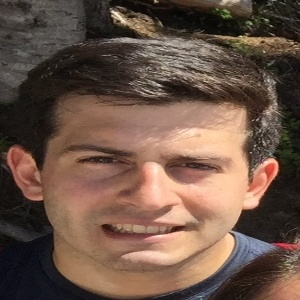

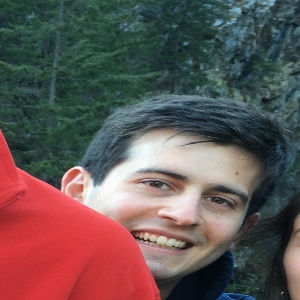

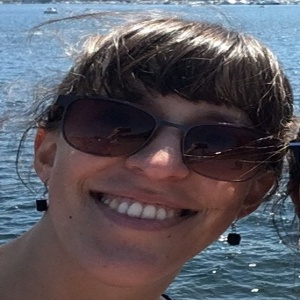

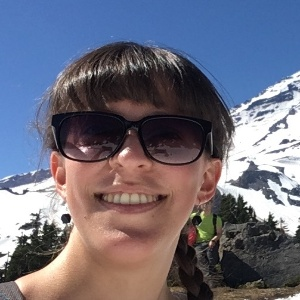

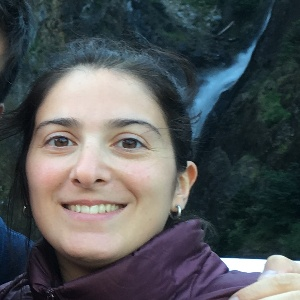

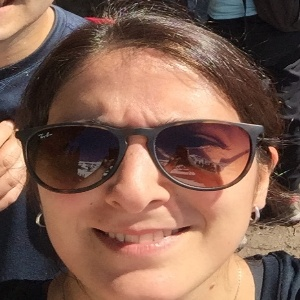

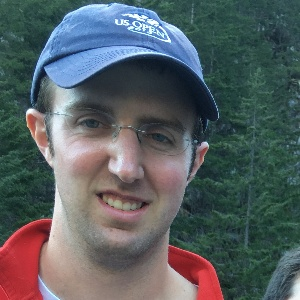

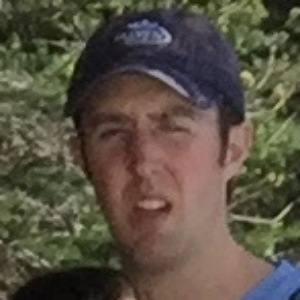

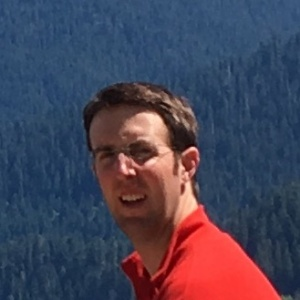

Number of images: 9


In [5]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

query = """
[ 
   {
      "FindEntity" : {
         "class" : "Hike", 
         "_ref": 2,
         "results" : {
            "list" : [ "place", "id", "type"]
         }
      }
   },
   {
      "FindEntity" : {
         "class" : "Person", 
         "_ref": 34,
         "link" : { "ref": 2},
         "results" : {
            "list" : [ "name", "lastname"]
         }
      }
   }, 
   {
      "FindImage" : {
         "link" : { "ref": 34, "class": "profile_pic"},
         "operations": [
             {
                 "type": "resize",
                 "height": 300,
                 "width": 300
             }
         ]
      }
   }
]   
"""

response, images = db.query(query)
# print (db.get_last_response_str())

util.display_images(images)    
print ("Number of images:", len(images))